<a href="https://colab.research.google.com/github/vperezguti/Resp-Experto-data---caso-practico/blob/main/Modelo_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from keras.utils.vis_utils import plot_model

#Plot Images
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

folder_dir = '/content/drive/MyDrive/Curso Data Science/mi_proyecto/images'
import random

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Curso Data Science/mi_proyecto/images'
img_height = 224
img_width = 224
batch_size = 32
    
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
    
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


class_names = train_ds.class_names

Found 1148 files belonging to 10 classes.
Using 919 files for training.
Found 1148 files belonging to 10 classes.
Using 229 files for validation.


In [ ]:
model_VGG16 = tf.keras.models.load_model('/content/drive/MyDrive/Curso Data Science/mi_proyecto/model_VGG16.h5')

In [ ]:
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

58889256/58889256 [==============================] - 1s 0us/step
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(10, activation = 'softmax')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input,x)

In [ ]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

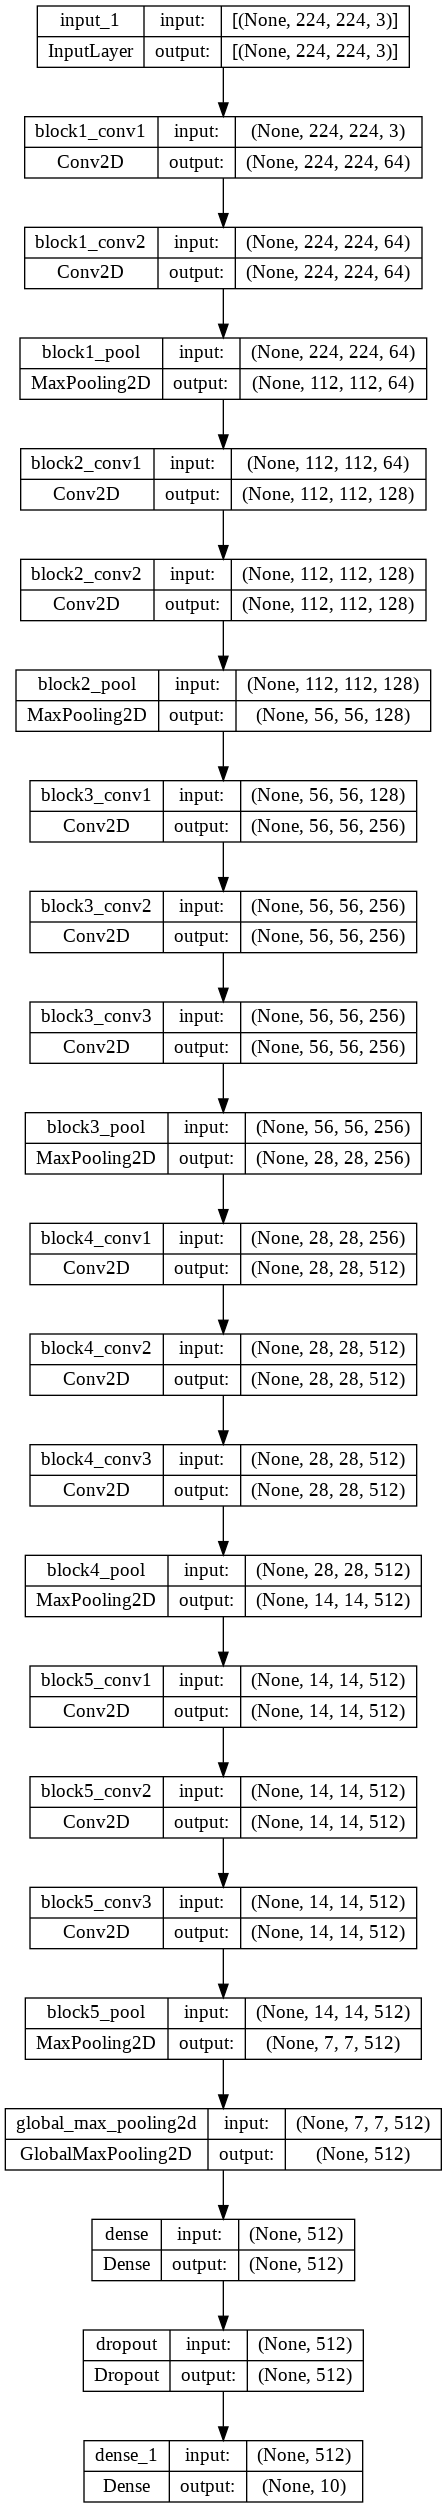

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True,show_layer_names=True)

In [ ]:
vgg_classifier = model.fit(train_ds, epochs = 15, validation_data=val_ds,
                           batch_size = batch_size, verbose = 1)

Epoch 1/15
29/29 [==============================] - 611s 20s/step - loss: 50.7449 - acc: 0.2884 - val_loss: 20.6213 - val_acc: 0.4672
Epoch 2/15
29/29 [==============================] - 532s 18s/step - loss: 12.0743 - acc: 0.4973 - val_loss: 6.0044 - val_acc: 0.5546
Epoch 3/15
29/29 [==============================] - 532s 18s/step - loss: 4.7654 - acc: 0.5386 - val_loss: 3.1647 - val_acc: 0.5633
Epoch 4/15
29/29 [==============================] - 534s 18s/step - loss: 2.6646 - acc: 0.5756 - val_loss: 2.2017 - val_acc: 0.5852
Epoch 5/15
29/29 [==============================] - 534s 18s/step - loss: 1.7571 - acc: 0.5832 - val_loss: 1.9006 - val_acc: 0.5939
Epoch 6/15
29/29 [==============================] - 533s 18s/step - loss: 1.4989 - acc: 0.6148 - val_loss: 1.7082 - val_acc: 0.5895
Epoch 7/15
29/29 [==============================] - 534s 18s/step - loss: 1.1340 - acc: 0.6736 - val_loss: 1.8416 - val_acc: 0.5764
Epoch 8/15
29/29 [==============================] - 532s 18s/step - loss:

In [ ]:
# Guardar el modelo y leer el modelo
#model.save('/content/drive/MyDrive/Curso Data Science/mi_proyecto/Modelo_VGG16.h5')
 #Leer el modelo
#model = tf.keras.models.load_model('/content/drive/MyDrive/Curso Data Science/mi_proyecto/Modelo_VGG16.h5') 

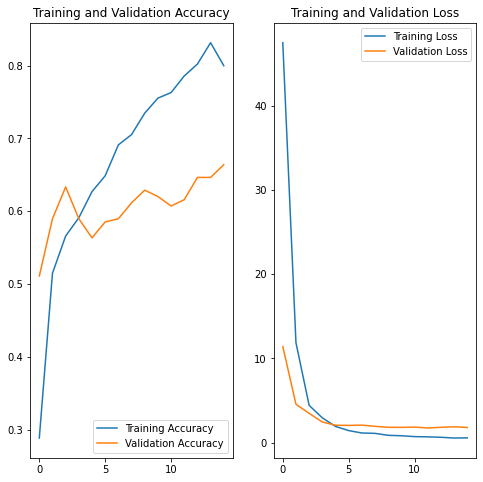

In [ ]:
acc = vgg_classifier.history['acc']
val_acc = vgg_classifier.history['val_acc']

loss = vgg_classifier.history['loss']
val_loss = vgg_classifier.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Creamos un diccionario con las fotos
datos_test = {'Agaricus campestris': 'https://www.mycodb.fr/photos/Agaricus_campestris_2003_dr_1.jpg', 
              'Macrolepiota procera': 'https://www.mycodb.fr/photos/Macrolepiota_procera_2014_df_1.jpg', 
              'Amanita muscaria': 'https://www.mycodb.fr/photos/Amanita_muscaria_2005_ov_2.jpg', 
              'Amanita phalloides': 'https://www.mycodb.fr/photos/Amanita_phalloides_2011_jpa_1.jpg', 
              'Boletus edulis': 'https://www.mycodb.fr/photos/Boletus_edulis_2007_ov_1.jpg', 
              'Lepista nuda': 'https://www.mycodb.fr/photos/Lepista_nuda_2019_db_1.jpg', 
              'Marasmius oreades': 'https://www.mycodb.fr/photos/Marasmius_oreades_2000_dr_1.jpg', 
              'Pleurotus ostreatus': 'https://www.mycodb.fr/photos/Pleurotus_ostreatus_2015_hm_1.jpg', 
              'Tricholoma portentosum': 'https://www.mycodb.fr/photos/Tricholoma_portentosum_2014_td_3.jpg', 
              'Rubroboletus satanas': 'https://www.mycodb.fr/photos/Rubroboletus_satanas_2006_ar_1.jpg'}

In [ ]:
#Crearemos una función para el cálculo 
def predict_seta(img_height, img_width, clases, modelo, img_url):
  img_path = tf.keras.utils.get_file('mushroom_image'+str(random.randint(0, 999)), origin=img_url)

  img = tf.keras.preprocessing.image.load_img(
      img_path, target_size=(img_height, img_width, 3)
  )

#plt.imshow(img)

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create a batch

  predictions = modelo.predict(img_array)

  predictions_sigmoid = tf.nn.sigmoid(predictions)
  score = tf.nn.softmax(predictions[0])

  return clases[np.argmax(score)], img

1/1 [==============================] - 1s 574ms/step


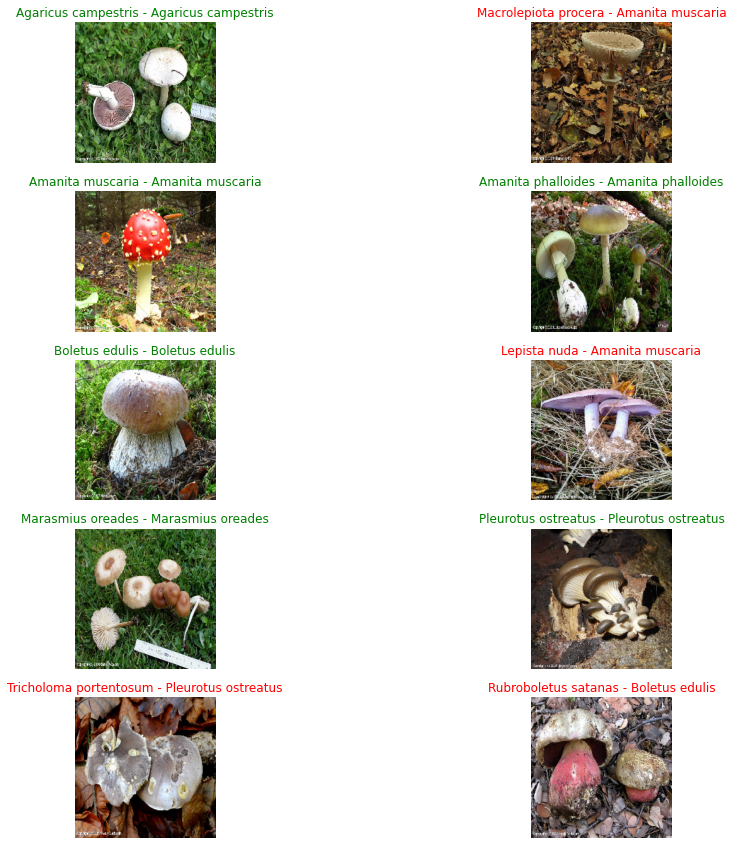

In [ ]:
predict_dict = {}
plt.figure(figsize=(15,15))
i = 1
for nombre, url in datos_test.items():
  prediccion = predict_seta(img_height, img_width, class_names, model_VGG16, url)
  predict_dict[nombre] = prediccion[0]
  ax = plt.subplot(5,2,i)
  plt.imshow(prediccion[1])
  if nombre == prediccion[0]:
    plt.title(nombre+" - "+prediccion[0], color = 'g')
  else:  
    plt.title(nombre+" - "+prediccion[0], color = 'r')
  plt.axis("off")
  i += 1
#print(predict_dict)